In [1]:
import os
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 파이썬 문자열 관련 함수 사용
- os
- glob
- replace
- split
- join
- strip

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!unzip -qq /content/drive/"My Drive"/"[AOP:딥러닝 인공지능]"/TEST/"1. [Tensorflow 2.0 과 Pytorch]"/"3. 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch"/"3. dataset"/cifar.zip


In [4]:
train_paths = glob('/content/cifar/train/*.png')
test_paths = glob('/content/cifar/test/*.png')

In [5]:
len(train_paths), len(test_paths)

(50000, 10000)

In [7]:
train_paths.sort()
test_paths.sort()

In [8]:
path = train_paths[0]
path

'/content/cifar/train/0_frog.png'

In [11]:
os.path.basename(path)

'0_frog.png'

In [12]:
fname = os.path.basename(path)
cls_name = fname.replace('.png', '').split('_')[-1]
cls_name

'frog'

### class 이름 얻은 것을 함수로 묶기

In [13]:
def get_class_name(path):
  fname = os.path.basename(path)
  cls_name = fname.replace('.png', '').split('_')[-1]
  return cls_name

In [14]:
cls_name = get_class_name(path) #cls_name 변수 값 변경됨. 따라서 위 셀들을 다시 재실행하는 경우 에러가능성있음.

In [15]:
path, cls_name

('/content/cifar/train/0_frog.png', 'frog')

# Class 수 확인

In [17]:
class_names = []

for path in train_paths:
  cls_name = get_class_name(path)
  class_names.append(cls_name)

# 같은 코드(list comprehension)
# class_names = [get_class_name(path) for path in train_paths]

In [18]:
len(class_names)

50000

In [19]:
np.unique(class_names)

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [21]:
uniques = np.unique(class_names, return_counts=True)

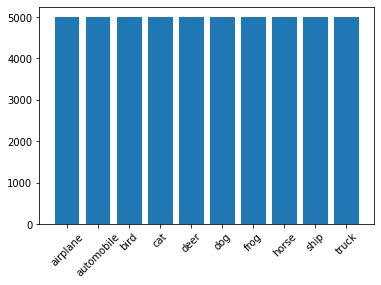

In [22]:
plt.bar(uniques[0], uniques[1])
# 같은 코드
#plt.bar(*uniques)
plt.xticks(rotation=45)
plt.show()

# DataFrame 생성

파이썬에서 csv 또는 excel을 다룰 때 사용되는 library  
주로 엑셀과 같이 테이블 형식으로 되어있는 데이터들을 다룹니다  

### DataFrame 생성 방법

In [23]:
data_ex = {'a':[1,2,3], 'b':[10,20,30], 'c':[100,200,300]}

In [24]:
df_ex = pd.DataFrame(data_ex)
df_ex

,a,b,c
0,1,10,100
1,2,20,200
2,3,30,300


In [27]:
train_paths[0], class_names[0]

('/content/cifar/train/0_frog.png', 'frog')

In [29]:
data = {'name' : train_paths, 'class' : class_names}


In [32]:
train_df = pd.DataFrame(data)
train_df.head()

,name,class
0,/content/cifar/train/0_frog.png,frog
1,/content/cifar/train/10000_automobile.png,automobile
2,/content/cifar/train/10001_frog.png,frog
3,/content/cifar/train/10002_frog.png,frog
4,/content/cifar/train/10003_ship.png,ship


In [33]:
test_names = [get_class_name(path) for path in test_paths]

In [39]:
test_df = {'name' : test_paths, 'class' : test_names}

In [40]:
test_df = pd.DataFrame(test_data)

In [41]:
test_df.head()

,name,class
0,/content/cifar/test/0_cat.png,cat
1,/content/cifar/test/1000_dog.png,dog
2,/content/cifar/test/1001_airplane.png,airplane
3,/content/cifar/test/1002_ship.png,ship
4,/content/cifar/test/1003_deer.png,deer


## 만들어진 DataFrame 저장

In [42]:
train_csv_path = 'train_dataset.csv'
test_csv_path = 'test_dataset.csv'

In [43]:
train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)
# 코랩 실행 경로에 생성

index는 앞에 index가 csv 안에서 앞에 저장이 되지 않도록 하기 위함

![image.png](attachment:image.png)

## Data 확인

In [44]:
from PIL import Image
from tqdm import tqdm_notebook

In [45]:
heights = []
widths = []

In [47]:
for path in tqdm_notebook(train_paths):
  img_pil = Image.open(path)
  image = np.array(img_pil)
  h, w, c = image.shape

  heights.append(h)
  widths.append(w)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [48]:
np.unique(heights), np.unique(widths)

(array([32]), array([32]))